In [ ]:
# Link: https://www.youtube.com/watch?v=2eeYqJ0uBKE

In [12]:
# Setup Super Mario Brothers

In [2]:
# Installs the Super Mario Brothers game environment along with the Nintendo Entertainment System (NES) emulator
# dependency, for Python, from Gym
!pip install gym_super_mario_bros==7.3.0 nes_py

     |████████████████████████████████| 198 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 9.3 MB/s eta 0:00:01
  Created wheel for nes-py: filename=nes_py-8.1.8-cp38-cp38-linux_x86_64.whl size=498002 sha256=7894c84a6e069932047fd434159ed634b13bc6e4111f862cb7fa28a4ba3caa3e
  Stored in directory: /home/maxbrette/.cache/pip/wheels/8d/6e/f0/113c979eba40def28ee9b3c81a4adec00386106d81fb3bc2c2
Successfully built nes-py
  Attempting uninstall: pyglet
    Found existing installation: pyglet 1.5.21
    Uninstalling pyglet-1.5.21:
      Successfully uninstalled pyglet-1.5.21


In [3]:
# Imports the Super Mario Brothers game
import gym_super_mario_bros

# Imports the Joypad wrapper
from nes_py.wrappers import JoypadSpace

# Imports the simplified Super Mario Brothers game controls
#
# Critical for teaching game oriented machine learning AIs, as the more complex the control scheme 
# the more difficult it is for said AIs to learn how to play
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [10]:
# The list of the simplified form of the game's control / movement scheme 
# Display's all possible actions the AI may take within the game environment
#
# The 7 possible actions include:
#    NOOP: No action taken
#    right: Move right
#    right, A: Move right with hit A key
#    right, B: Move right with hit B key
#    right, A, B: Move right with hit both A & B keys
#    A: Hit A key
#    left: Move  left
#print(SIMPLE_MOVEMENT)

[['NOOP'], ['right'], ['right', 'A'], ['right', 'B'], ['right', 'A', 'B'], ['A'], ['left']]


In [11]:
# Sets up the actual game environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')

# Displays the number of different possible original actions before simplification (256), 
# which is far to high for this AI to properly learn, and therefore mut be dumbed down
#print(env.action_space)

# Wrapps the environment with JoypadSpace so as to enable the simplified control scheme
env = JoypadSpace(env, SIMPLE_MOVEMENT)

# Displays the number of different possible original actions following simplification (7), 
# making it much easier for the AI to learn
#print(env.action_space)

Discrete(256)
Discrete(7)


In [13]:
# Returns the frame of the actual game environment being played
# 240 pixels tall by 256 pixels wide with 3 channels (Red, Green, Blue for a color image)
#print(env.observation_space.shape)

(240, 256, 3)


In [19]:
# Has Python playing Super Mario Brothers via a random set of simpliefied actions without any AI

# Creates a flag as to whether or not to restart the game
# Begins as True in order to instatiate at least the very first loop
done = True 

# Loop's through each frame within the game
for step in range(100000): 
    if done:
        
        # The equivalent of starting / booting up the NES and launching the Super Mario Brother's Game
        env.reset()
    
    # Passes through a random action into the game (i.e. Move right, move left, jump, etc.) via the .sample()
    # of the game environment's simplified action space
    #
    # Returns:
    # A game environment state: The current frame
    # A reward: Given depending on how fast and how far Mario moves towards the right of the game level's map (env.step(1)[1])
    # Whether or not the game is finished (Mario has died): True or False (env.step(1)[2])
    # Miscellaneous Information: Coins collected, score, status, time, world, etc. (env.step(1)[2])
    state, reward, done, info = env.step(env.action_space.sample())
    
    # Display's the game environment onto the screen
    env.render()
    
# Closes and ends the game environment
env.close()

KeyboardInterrupt: 

In [20]:
# Preprocess Environment

In [21]:
# Install PyTorch
#!pip install torch==1.8.2+cu111 torchvision==0.9.2+cu111 torchaudio==0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

In [29]:
# Install Stable Baselines
!pip install stable-baselines3[extra]

  Using cached stable_baselines3-1.4.0-py3-none-any.whl (176 kB)
Reason for being yanked: re-release with new wheels
  Using cached atari-py-0.2.6.tar.gz (790 kB)


  Created wheel for atari-py: filename=atari_py-0.2.6-cp38-cp38-linux_x86_64.whl size=2811820 sha256=755697132ffbf0b2458fe7010d9fa2cf02b2f9775298e7f99d38f467d81e9996
  Stored in directory: /home/maxbrette/.cache/pip/wheels/7f/5e/27/2e90b9887063d82ee2f9f8b2f8db76bb2290aa281dc40449c8
Successfully built atari-py


In [30]:
# Import Frame Stacker Wrapper & GrayScaling Wrapper
#
# FrameStack allows for the capturing of several frames whilst playing Mario, 
# allowing for a form of memory for the AI to obtain context as to what is happening around it, such as 
# Mario's velocity, where enemies are moving, etc., by stacking them on top of one another
#
# GrayScale turns color into black and white, doing away with 3 times the number of pixel information required by
# layering red, green and blue frames together, cutting out otherwise unnecessary data to be analyzed and processed
from gym.wrappers import FrameStack, GrayScaleObservation

# Import Vectorization Wrappers
#
# VecFrameStack is the wrapper which allows for FrameStack
# DummyVecEnv is the wrapper needed to wrap the base model in a vectorized wrapper, tranforming said model 
# into vectorized information able to be passed into the AI
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv

# Import Matplotlib
# Displays the impact of frame stacking
from matplotlib import pyplot as plt

In [39]:
# 1. Creates the base game environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')

# 2. Simplifies the control scheme
env = JoypadSpace(env, SIMPLE_MOVEMENT)

# 3. Grayscales the game environment, reducing the data needed to be processed
# 240 * 256 * 3  = 184,320 vs 240 * 256 * 1 = 61440
env = GrayScaleObservation(env, keep_dim = True)

# 4. Wraps the game environment inside a Dummy Environment
env = DummyVecEnv([lambda:env])

# 5. Stacks the frames
# Second variable determines how many frame (i.e. length of memory) to be 'saved'
env = VecFrameStack(env, 4, channels_order = 'last')

In [95]:
# Utilize Matplotlib in order to display a frame of the game environment
state = env.reset()

In [77]:
# The shape of the data changes for every wrapper the base game environment is passed through
print(state.shape)

(1, 240, 256, 4)


In [103]:
# Environment is vectorized, therefore it must be placed into an array
# Having Mario Jump
state, reward, done, info = env.step([5])

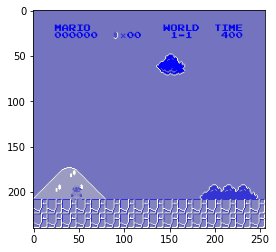

In [79]:
#plt.imshow(state) # Without Dummy Environment
plt.imshow(state[0]) # Witho Dummy Environment

<function matplotlib.pyplot.show(close=None, block=None)>

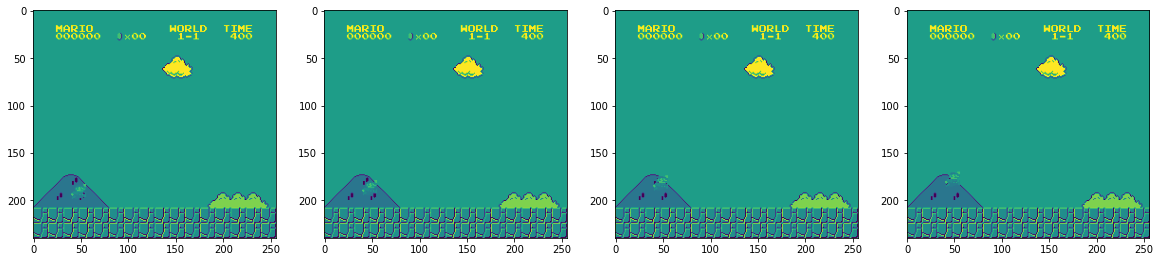

In [104]:
# Displays the Frame Stacked 'Memory' that the AI 'sees' and can contextualize its environment from
plt.figure(figsize = (20, 16))
for idx in range(state.shape[3]):
    plt.subplot(1, 4, idx + 1)
    plt.imshow(state[0][:,:,idx])
plt.show

In [66]:
# Train the Reinforcement Learning Model

In [67]:
# Reinforcement Learning
# Area51: Agent, Reward, Environment, Action
# The AI's Agent takes an action within the environment, for which it is then either rewarded or given a penalty

In [69]:
# Import OS for file path management
import os

# Import Proximal Policy Optimization (PPO) for chosen machine learning algorithms
from stable_baselines3 import PPO

# Import Base Callback in order to save completed AI models
# Optional: For backup purposes every x number of steps, very large file sizes, maybe better to do manually
from stable_baselines3.common.callbacks import BaseCallback

In [72]:
class TrainAndLoggingCallback(BaseCallback):
    
    def __init__(self, check_freq, save_path, verbose = 1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path
        
    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok = True)
            
    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)
        
        return True

In [70]:
# Create model checkpoint and logs directories
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [87]:
# Sets up the AI model saving callback system
callback = TrainAndLoggingCallback(check_freq = 10000, save_path = CHECKPOINT_DIR)

In [88]:
# The actual, temporary AI model that has yet to be trained, started
#
# Policy Network determines the type of neural network behind the scenes of deep learning AI models
#
# CnnPolicy (Convelutional Neural Network Polciy)chosen in this instance as it is very quick in terms of 
# learning with images, in our case frames from the video game Super Mario Brothers, MlpPolicy for tabular data
#
# env: The prepocessed data
# verbose: Obtain a ton of information once the training begins
# tensorboard_log: Information as to how the training is performing as the model runs
# learning_rate: Critical, learn to quickly and the AI may converge to a poor model, 
#                train to slowly and it might take years
# n_steps: How may frames per game before updating the neural network
#
model = PPO('CnnPolicy', env, verbose = 1, tensorboard_log = LOG_DIR, learning_rate = 0.000001, n_steps = 512)

Using cpu device
Wrapping the env in a VecTransposeImage.


In [89]:
# Trains the AI model and where it begins to actually learn
#
# total_timesteps: How long via how many frames the model should learn
model.learn(total_timesteps = 10000, callback = callback) # If automatic callback not desired

Logging to ./logs/PPO_1
----------------------------
| time/              |     |
|    fps             | 79  |
|    iterations      | 1   |
|    time_elapsed    | 6   |
|    total_timesteps | 512 |
----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 17           |
|    iterations           | 2            |
|    time_elapsed         | 59           |
|    total_timesteps      | 1024         |
| train/                  |              |
|    approx_kl            | 7.904449e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.95        |
|    explained_variance   | -0.00381     |
|    learning_rate        | 1e-06        |
|    loss                 | 100          |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.000216    |
|    value_loss           | 324          |
------------------------------------------

-------------------------------------------
| time/                   |               |
|    fps                  | 10            |
|    iterations           | 13            |
|    time_elapsed         | 653           |
|    total_timesteps      | 6656          |
| train/                  |               |
|    approx_kl            | 3.2638316e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | -0.0986       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.17          |
|    n_updates            | 120           |
|    policy_gradient_loss | -0.000398     |
|    value_loss           | 0.833         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 10            |
|    iterations           | 14            |
|    time_elapsed         | 706 

In [92]:
# Saving the AI model manually
model.save('SuperMarioBrothersTestAIModel')

In [90]:
# Test The Model

In [91]:
# Loading A Desired Model
model = PPO.load('./train/best_model_10000')

In [94]:
# Starting the Super Mario Brothers game environment
state = env.reset()

# Loops through the game environment
while True:
    action, _state = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

KeyboardInterrupt: 